In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.models as models
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 256
learning_rate = 0.001
num_epoch = 100

In [2]:
transform_train = transforms.Compose([transforms.Resize((32, 32)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
                                      transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
                                      transforms.ToTensor()
                                     ])

cf10_train = dset.CIFAR10("./data",train=True,transform=transform_train, target_transform=None, download=False)
cf10_test = dset.CIFAR10("./data",train=False,transform=transforms.ToTensor(), target_transform=None, download=False)

train_loader = torch.utils.data.DataLoader(cf10_train, batch_size=batch_size, shuffle=True, num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(cf10_test, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)

In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer = nn.Sequential(
            nn.Conv2d(3,16,3,padding = 1),
            nn.ReLU(),
            nn.Conv2d(16,16,3,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(16,32,3,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,3,padding = 1),
            nn.ReLU(),
            nn.Conv2d(64,64,3,padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4*4*64,2048),
            nn.ReLU(),
            nn.Linear(2048,4096),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(4096,1024),
            nn.ReLU(),
            nn.Linear(1024,10)
        )
        
    def forward(self,x):
        out = self.layer(x)
        out = out.view(batch_size, -1) 
        out = self.fc_layer(out)
        return out

In [4]:
##optimizer = optim.AdamW(model.parameters(),lr=0.001, betas=(0.9, 0.999), eps=1e-8,
##                 weight_decay=1e-4, amsgrad=False)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(),lr=learning_rate, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=1e-4, amsgrad=False)



In [8]:
##train_accuracy = []
##test_accuracy = []


for i in range(num_epoch):
        train_total = 0
        train_correct = 0
        test_total = 0
        test_correct = 0
        for j,[image,label] in enumerate(train_loader):

            x = image.to(device)
            y_= label.to(device)

            optimizer.zero_grad()
            output = model.forward(x)
            loss = loss_func(output,y_)
            loss.backward()
            optimizer.step()


            _,output_index = torch.max(output,1)
            train_total += label.size(0)
            train_correct += (output_index == y_).sum().float()

        train_accuracy.append(train_correct/train_total*100)

        with torch.no_grad():
            for image, label in test_loader:
                x = image.to(device)
                y_= label.to(device)
                output = model.forward(x)

                _,output_index = torch.max(output,1)
                test_total += label.size(0)
                test_correct += (y_ == output_index).sum().float()
        test_accuracy.append(test_correct/test_total*100)


        print("epoch : ",i+101)
        print("train data accuracy : ", train_correct/train_total*100)
        print("test data accuracy : ", test_correct/test_total*100)
        print("-------------------------------------")



epoch :  101
train data accuracy :  tensor(78.7520, device='cuda:0')
test data accuracy :  tensor(77.0433, device='cuda:0')
-------------------------------------
epoch :  102
train data accuracy :  tensor(78.5877, device='cuda:0')
test data accuracy :  tensor(77.5040, device='cuda:0')
-------------------------------------
epoch :  103
train data accuracy :  tensor(79.1306, device='cuda:0')
test data accuracy :  tensor(77.3738, device='cuda:0')
-------------------------------------
epoch :  104
train data accuracy :  tensor(79.0625, device='cuda:0')
test data accuracy :  tensor(76.7628, device='cuda:0')
-------------------------------------
epoch :  105
train data accuracy :  tensor(79.0284, device='cuda:0')
test data accuracy :  tensor(77.0232, device='cuda:0')
-------------------------------------
epoch :  106
train data accuracy :  tensor(79.1206, device='cuda:0')
test data accuracy :  tensor(77.0533, device='cuda:0')
-------------------------------------
epoch :  107
train data accu

test data accuracy :  tensor(78.1751, device='cuda:0')
-------------------------------------
epoch :  152
train data accuracy :  tensor(81.1559, device='cuda:0')
test data accuracy :  tensor(77.7544, device='cuda:0')
-------------------------------------
epoch :  153
train data accuracy :  tensor(81.0056, device='cuda:0')
test data accuracy :  tensor(77.8546, device='cuda:0')
-------------------------------------
epoch :  154
train data accuracy :  tensor(81.1659, device='cuda:0')
test data accuracy :  tensor(77.4339, device='cuda:0')
-------------------------------------
epoch :  155
train data accuracy :  tensor(81.3321, device='cuda:0')
test data accuracy :  tensor(77.0633, device='cuda:0')
-------------------------------------
epoch :  156
train data accuracy :  tensor(81.5885, device='cuda:0')
test data accuracy :  tensor(77.4339, device='cuda:0')
-------------------------------------
epoch :  157
train data accuracy :  tensor(81.5004, device='cuda:0')
test data accuracy :  tensor

KeyboardInterrupt: 

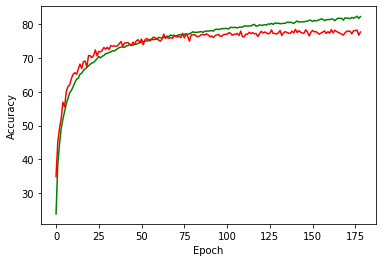

In [9]:
plt.plot(train_accuracy, 'g-', label="train")
plt.plot(test_accuracy, 'r-', label="test")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()